# Import

First import necessary methods. 

In [1]:
import numpy as np
from flair.data import Sentence
from flair.models import SequenceTagger
from flair.tokenization import SegtokSentenceSplitter

/home/teppi/projects/ner/.ner/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Import counter for counting values in list & pandas. 

In [2]:
from collections import Counter
import pandas as pd

# Extraction 

Save German Basic NER-Model in Variable tagger.

In [3]:
tagger = SequenceTagger.load('de-ner')

/home/teppi/projects/ner/.ner/lib/python3.9/site-packages/huggingface_hub/file_download.py:629: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


2023-02-09 16:22:13,196 loading file /home/teppi/.flair/models/ner-german/a125be40445295f7e94d0afdb742cc9ac40ec4e93259dc30f35220ffad9bf1f6.f46c4c5cfa5e34baa838983373e30051cd1cf1e933499408a49e451e784b0a11
2023-02-09 16:22:24,266 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


Save Tokenizer in Variable "Splitter".

In [4]:
splitter = SegtokSentenceSplitter()

Open first text document, tokenize and predict entities.

In [5]:
with open('1_Wahlperiode_TXT_sents/1_sents.txt') as f:
    contents = f.read()

sentences = splitter.split(contents)

tagger.predict(sentences)

Create empty List and save every line in said list.

In [6]:
ner_dict = []

for sentence in sentences:
    x = sentence.to_dict(tag_type='ner')
    ner_dict.append(x)

ner_dict[:10]

[{'text': '1   PLENARPROTOKOLL   01/1   07.09.1949   Plenarprotokoll vom 07.09.1949   Deutscher Bundestag — 1.',
  'ner': [{'value': 'ORG', 'confidence': 0.709118440747261}]},
 {'text': 'Sitzung.', 'ner': []},
 {'text': 'Bonn, Mittwoch, den 7. September 1949 1   1.',
  'ner': [{'value': 'LOC', 'confidence': 0.9994425177574158}]},
 {'text': 'Sitzung.', 'ner': []},
 {'text': 'Bonn, Mittwoch, den 7. September 1949.',
  'ner': [{'value': 'LOC', 'confidence': 0.9993625283241272}]},
 {'text': 'Eröffnungsansprache   des Alterspräsidenten Löbe . .',
  'ner': [{'value': 'PER', 'confidence': 0.9932059049606323}]},
 {'text': '.', 'ner': []},
 {'text': '.', 'ner': []},
 {'text': '1 B   Namensaufruf der Abgeordneten und Wahl   des Präsidenten  . .',
  'ner': []},
 {'text': '.', 'ner': []}]

Task: how to extract value? 

In [7]:
ner_dict[0]["ner"]

[{'value': 'ORG', 'confidence': 0.709118440747261}]

Try: looping over list and extract only the "ner"-part

In [8]:
value_list = []

for i in ner_dict: 
    value_list.append(i["ner"])
    
value_list[:10]

[[{'value': 'ORG', 'confidence': 0.709118440747261}],
 [],
 [{'value': 'LOC', 'confidence': 0.9994425177574158}],
 [],
 [{'value': 'LOC', 'confidence': 0.9993625283241272}],
 [{'value': 'PER', 'confidence': 0.9932059049606323}],
 [],
 [],
 [],
 []]

Problem: not getting the text the value is regarded to. 

Task: How to extract value with text?

In [9]:
span_list = []

for sentence in sentences: 
    span_list.append(sentence.get_spans("ner"))

span_list[:10]

[[Span[9:11]: "Deutscher Bundestag" → ORG (0.7091)],
 [],
 [Span[0:1]: "Bonn" → LOC (0.9994)],
 [],
 [Span[0:1]: "Bonn" → LOC (0.9994)],
 [Span[3:4]: "Löbe" → PER (0.9932)],
 [],
 [],
 [],
 []]

Taks: How to process this further?

Two Loops to get every single information extracted from span.
Problem: How to save these information effectively? 

In [10]:
for sentence in sentences: 
    for entity in sentence.get_spans("ner"):
        
        start_position = entity.start_position
        end_position = entity.end_position
        text = entity.text
        value = entity.get_label("ner").value
        score = entity.get_label("ner").score
        
        
        
        print(start_position, end_position, text, value, score)

75 94 Deutscher Bundestag ORG 0.709118440747261
0 4 Bonn LOC 0.9994425177574158
0 4 Bonn LOC 0.9993625283241272
44 48 Löbe PER 0.9932059049606323
10 18 Adenauer PER 0.9877205491065979
20 23 CDU ORG 0.9999992847442627
6 13 Reimann PER 0.7673457264900208
15 18 KPD ORG 0.9993835687637329
22 32 3 B Böhm ORG 0.9083660046259562
34 37 SPD ORG 0.9999603033065796
51 57 Köhler PER 0.9978362917900085
2 16 D Ollenhauer PER 0.527456060051918
18 21 SPD ORG 0.9998646974563599
35 40 Heuss PER 0.9986020922660828
42 45 FDP ORG 0.9999322891235352
59 65 Seelos PER 0.9984496831893921
67 69 BP ORG 0.8012349009513855
73 86 4 B Reimann ORG 0.7959638237953186
88 91 KPD ORG 0.9997462630271912
105 111 Schmid PER 0.6505678296089172
113 116 SPD ORG 0.9999854564666748
156 162 Köhler PER 0.9998407363891602
25 31 Renner PER 0.9896306395530701
33 36 KPD ORG 0.9811169505119324
51 61 Ollenhauer PER 0.736710250377655
63 66 SPD ORG 0.9998327493667603
144 160 Weihe des Hauses MISC 0.9388060569763184
176 196 Ludwig van Beet

Idea: creating empty lists in which every Entity can be saved respectively.
Again: Nested looping.
Then, saving text and value in respective variables. 
With if-clause checking after Entity and append that Entity into right list. 

In [11]:
ORG_list = []
PER_list = []
LOC_list = []

for sentence in sentences: 
    for entity in sentence.get_spans("ner"): 
        text = entity.text
        value = entity.get_label("ner").value
        
        if value == "ORG": 
            ORG_list.append(text)
        elif value == "PER":
            PER_list.append(text)
        elif value == "LOC":
            LOC_list.append(text)

Count unique values of ORG_list. 

In [12]:
unique_ORG_list = Counter(ORG_list)

unique_ORG_list

Counter({'Deutscher Bundestag': 1,
         'CDU': 5,
         'KPD': 8,
         '3 B Böhm': 1,
         'SPD': 10,
         'FDP': 4,
         'BP': 3,
         '4 B Reimann': 1,
         'Deutschen Bundestags': 2,
         'Deutschen Bewegung': 1,
         'Deutschen Reichstags': 1,
         'Bundestags': 7,
         'CSU': 3,
         'Freien Demokraten': 1,
         'DP': 1,
         'DRP': 1,
         'WAV': 1,
         'Parlamentarischen Rates': 1,
         'Bundestag': 1,
         'Deutsche Bundestag': 1,
         'Vereinigten Stab': 1,
         'Arbeiterpartei': 1})

Convert Counter-Dict into DF.

In [13]:
ORG_df = pd.DataFrame.from_dict(unique_ORG_list, orient="index")

ORG_df = ORG_df.rename(columns={0:"occurances"})

ORG_df

,occurances
Deutscher Bundestag,1
CDU,5
KPD,8
3 B Böhm,1
SPD,10
FDP,4
BP,3
4 B Reimann,1
Deutschen Bundestags,2
Deutschen Bewegung,1


Count unique values of PER_list.

In [14]:
unique_PER_list = Counter(PER_list)

unique_PER_list

Counter({'Löbe': 7,
         'Adenauer': 5,
         'Reimann': 7,
         'Köhler': 18,
         'D Ollenhauer': 1,
         'Heuss': 2,
         'Seelos': 3,
         'Schmid': 6,
         'Renner': 8,
         'Ollenhauer': 7,
         'Ludwig van Beethoven': 2,
         'Labe': 1,
         'Rische': 1,
         'Arnold': 1,
         'Schlange-Schöningen': 3,
         'Louise Albertz': 1,
         'Dehler': 2,
         'Seebohm': 1,
         'Hans Böhm': 2,
         'Böhm': 4,
         'Lisa Albrecht': 1,
         'Carlo Schmid': 1,
         'Schäfer': 5,
         'Gundelach': 1,
         'Matthes': 1,
         'Aretin': 1,
         'Mießner': 1,
         'Pannebecker': 1,
         'Loritz': 1})

Convert Counter-Dict into DF.

In [15]:
PER_df = pd.DataFrame.from_dict(unique_PER_list, orient="index")

PER_df = PER_df.rename(columns={0:"occurances"})

PER_df

,occurances
Löbe,7
Adenauer,5
Reimann,7
Köhler,18
D Ollenhauer,1
Heuss,2
Seelos,3
Schmid,6
Renner,8
Ollenhauer,7


Count unique values of LOC_list.

In [16]:
unique_LOC_list = Counter(LOC_list)

unique_LOC_list

Counter({'Bonn': 6,
         'Bundesrepublik Deutschland': 7,
         'Berlin': 2,
         'Deutschland': 10,
         'Europa': 5,
         'Vereinigten Staaten': 3,
         'Straßburg': 1,
         'Gesamtdeutschland': 1,
         'Oder-Neiße-Grenze': 1,
         'Gesamtdeutschlands': 3,
         'Berlins': 1,
         'Europas': 3,
         'England': 2,
         'Frankreichs': 1,
         'Großbritanniens': 1,
         'Amerika': 1,
         'Groß-Berlin': 1,
         'Frankfurt': 1})

Convert Counter-Dict into DF.

In [38]:
LOC_df = pd.DataFrame.from_dict(unique_LOC_list, orient="index")

LOC_df = LOC_df.rename(columns={0:"occurances"})

LOC_df

,occurances
Bonn,6
Bundesrepublik Deutschland,7
Berlin,2
Deutschland,10
Europa,5
Vereinigten Staaten,3
Straßburg,1
Gesamtdeutschland,1
Oder-Neiße-Grenze,1
Gesamtdeutschlands,3


Mention: Loosing start & end position, as well as confidence score, but is this important for further processing? 

# Visualization

Plot the ORG dataframe.

<AxesSubplot: title={'center': 'Occurances of every ORG in 1_Wahlperiode'}, xlabel='ORG', ylabel='occurance'>

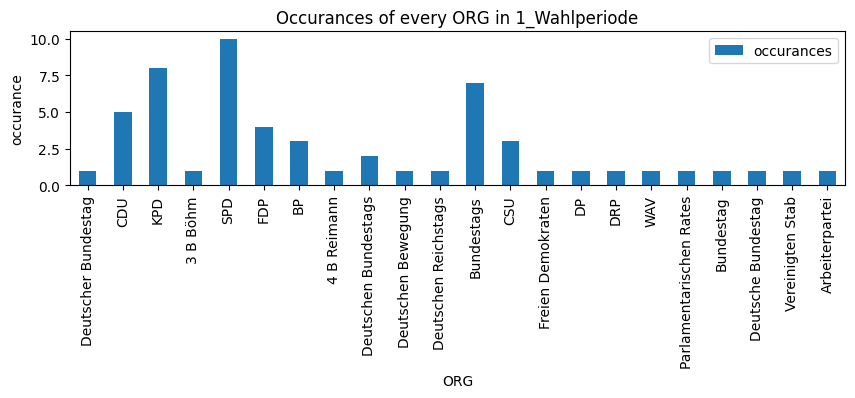

In [54]:
ORG_df.plot(figsize=(10,2), 
            kind="bar", 
            title="Occurances of every ORG in 1_Wahlperiode",
            xlabel="ORG",
            ylabel="occurance",
           )

Plot the PER dataframe.

<AxesSubplot: title={'center': 'Occurances of every PER in 1_Wahlperiode'}, xlabel='PER', ylabel='occurance'>

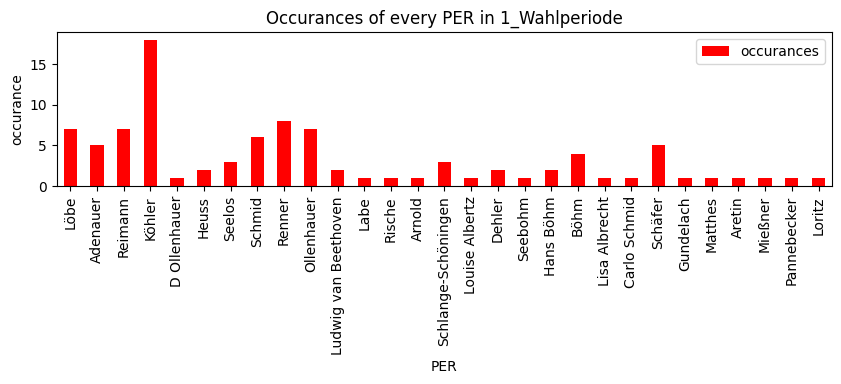

In [53]:
PER_df.plot(figsize=(10,2), 
            kind="bar", 
            title="Occurances of every PER in 1_Wahlperiode",
            xlabel="PER",
            ylabel="occurance",
            color="red"
           )

Plot the LOC dataframe.

<AxesSubplot: title={'center': 'Occurances of every LOC in 1_Wahlperiode'}, xlabel='LOC', ylabel='occurance'>

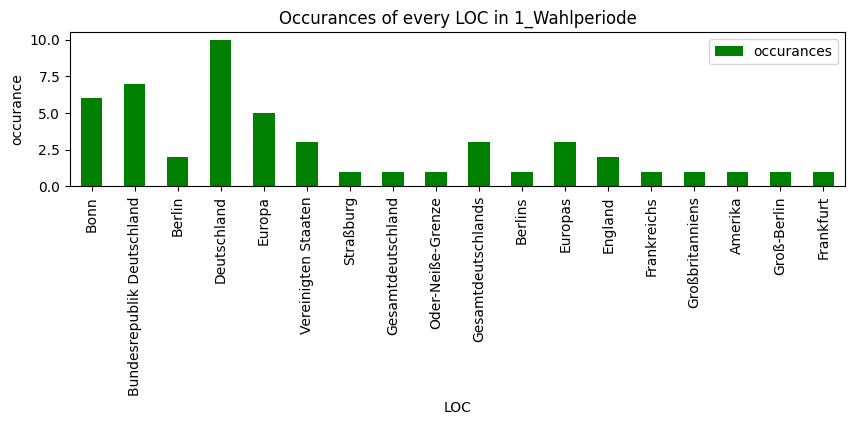

In [52]:
LOC_df.plot(figsize=(10,2), 
            kind="bar", 
            title="Occurances of every LOC in 1_Wahlperiode",
            xlabel="LOC",
            ylabel="occurance",
            color="green"
           )

This is a first try of visualization on one "Wahlperiode". This will be later extended. 

# TODOs

task: is this applicable for more than one text? 

task: shall we try normalizing entities? To what extend?

idea: looking for a model extracting more specific entities and maybe apply it to one entity (e.g. LOC) additionally? 

idea: apply this to a specific time period for a more detailed evaluation of a certain time. 